# Setting

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/UNIST/계량 경제학/march_cps.csv'
data = pd.read_csv(path)
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data.head()

,year,age,female,wkswork1,uhrswork,college_grad,race4,marital_status,veteran,weekly_earn,hourly_wage
0,1976,27,0,52,40,0,1,1,1,211.538467,5.288462
1,1976,28,0,52,40,1,1,1,0,201.923080,5.048077
2,1976,46,0,43,68,0,1,1,1,324.325592,4.769494
3,1976,26,0,52,35,1,2,1,0,206.730774,5.906593
4,1976,49,0,52,40,0,1,2,1,92.307693,2.307692


In [ ]:
data.tail()

,year,age,female,wkswork1,uhrswork,college_grad,race4,marital_status,veteran,weekly_earn,hourly_wage
870820,2010,47,1,40,40,1,3,1,0,450.000000,11.250000
870821,2010,46,1,52,35,1,3,2,0,1153.846191,32.967033
870822,2010,38,1,52,36,1,3,1,0,1000.000000,27.777779
870823,2010,39,1,52,35,1,3,1,0,442.307678,12.637362
870824,2010,38,1,52,50,1,1,1,0,884.615356,17.692307


# EDA

## college_grad

### 모든 데이터

<Axes: xlabel='college_grad', ylabel='weekly_earn'>

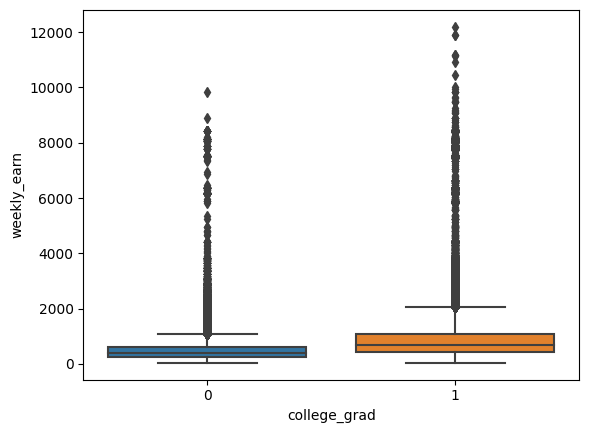

In [ ]:
sns.boxplot(data=data, 
            x='college_grad',
            y='weekly_earn')

<Axes: xlabel='college_grad', ylabel='hourly_wage'>

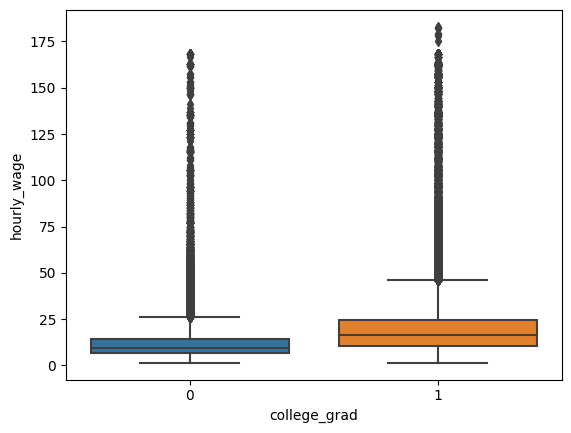

In [ ]:
sns.boxplot(data=data, 
            x='college_grad',
            y='hourly_wage')

### 연도별 대학 졸업에 따른 평균 임금

In [ ]:
mean_grad_data = data.groupby(['year', 'college_grad'])\
                .mean()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

mean_grad_data.columns = ['year', 'college_grad', 'mean_weekly_earn', 'mean_hourly_wage']
mean_grad_data.head()

,year,college_grad,mean_weekly_earn,mean_hourly_wage
0,1976,0,210.290476,5.025004
1,1976,1,295.297705,6.740785
2,1977,0,225.512279,5.346881
3,1977,1,307.140927,6.991125
4,1978,0,242.736173,5.728744


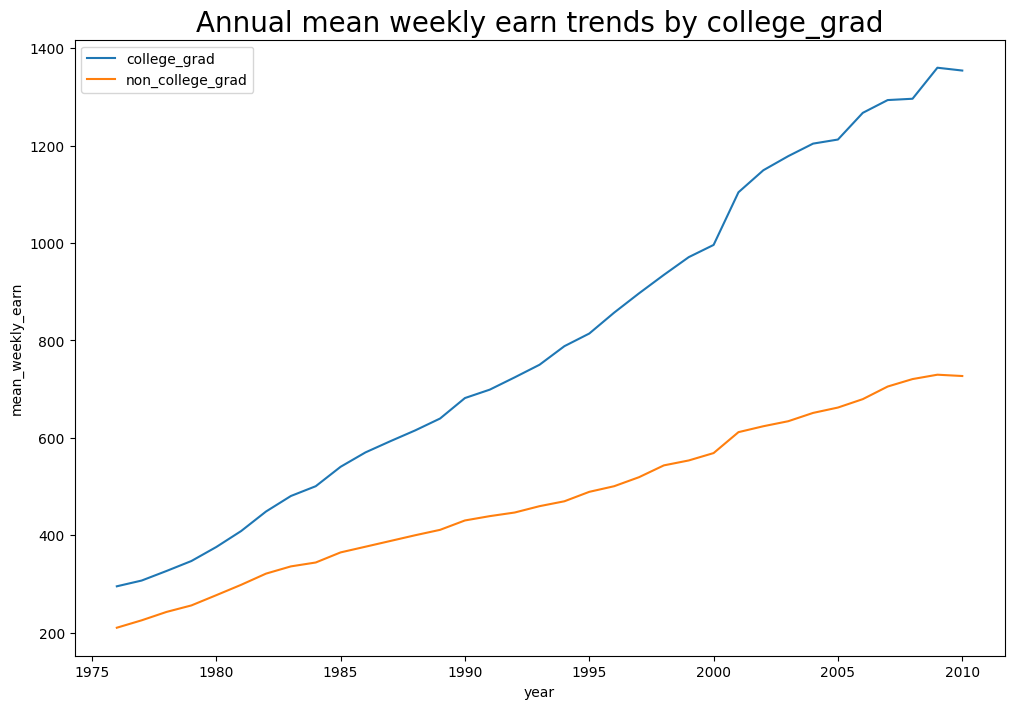

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual mean weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=mean_grad_data.loc[(mean_grad_data['college_grad']==1)],
             x=mean_grad_data.loc[(mean_grad_data['college_grad']==1)]['year'],
             y='mean_weekly_earn',
             label='college_grad')
sns.lineplot(data=mean_grad_data.loc[(mean_grad_data['college_grad']==0)],
             x=mean_grad_data.loc[(mean_grad_data['college_grad']==0)]['year'],
             y='mean_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

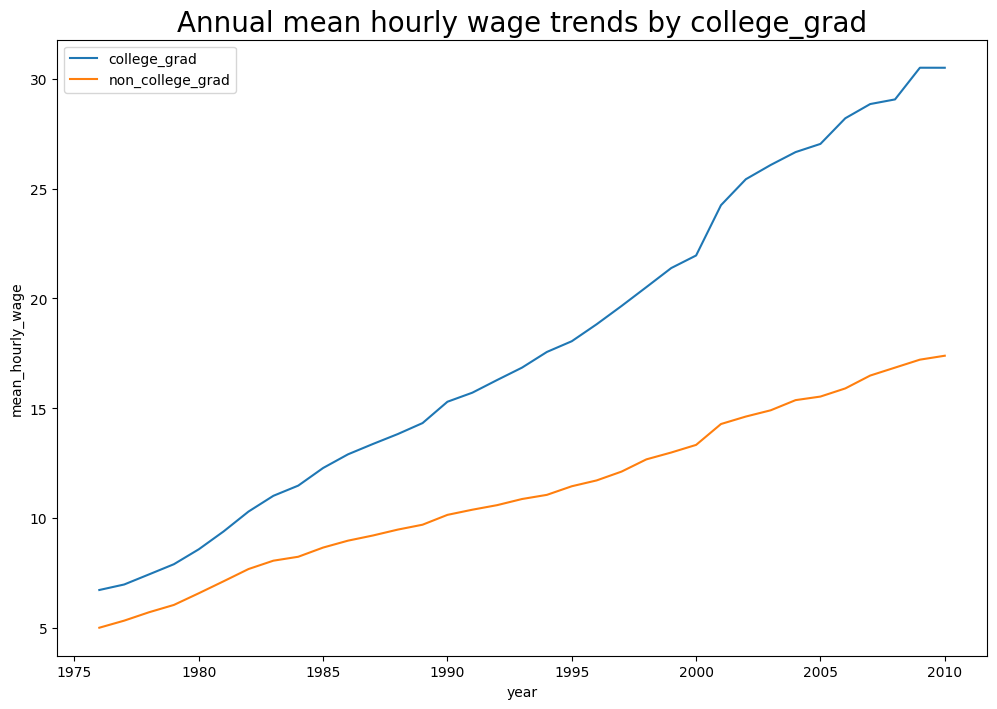

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual mean hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=mean_grad_data.loc[(mean_grad_data['college_grad']==1)],
             x=mean_grad_data.loc[(mean_grad_data['college_grad']==1)]['year'],
             y='mean_hourly_wage',
             label='college_grad')
sns.lineplot(data=mean_grad_data.loc[(mean_grad_data['college_grad']==0)],
             x=mean_grad_data.loc[(mean_grad_data['college_grad']==0)]['year'],
             y='mean_hourly_wage',
             label='non_college_grad')
plt.legend()
plt.show()

### 연도별 대학 졸업에 따른 최고 임금

In [ ]:
plt.figure(figsize=(12,8))
max_grad_data = data.groupby(['year', 'college_grad'])\
                .max()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

max_grad_data.columns = ['year', 'college_grad', 'max_weekly_earn', 'max_hourly_wage']
max_grad_data.head()

,year,college_grad,max_weekly_earn,max_hourly_wage
0,1976,0,1083.386353,19.230768
1,1976,1,961.538452,19.230768
2,1977,0,1111.111084,19.230770
3,1977,1,1000.000000,19.230770
4,1978,0,1250.000000,20.604397


<Figure size 1200x800 with 0 Axes>

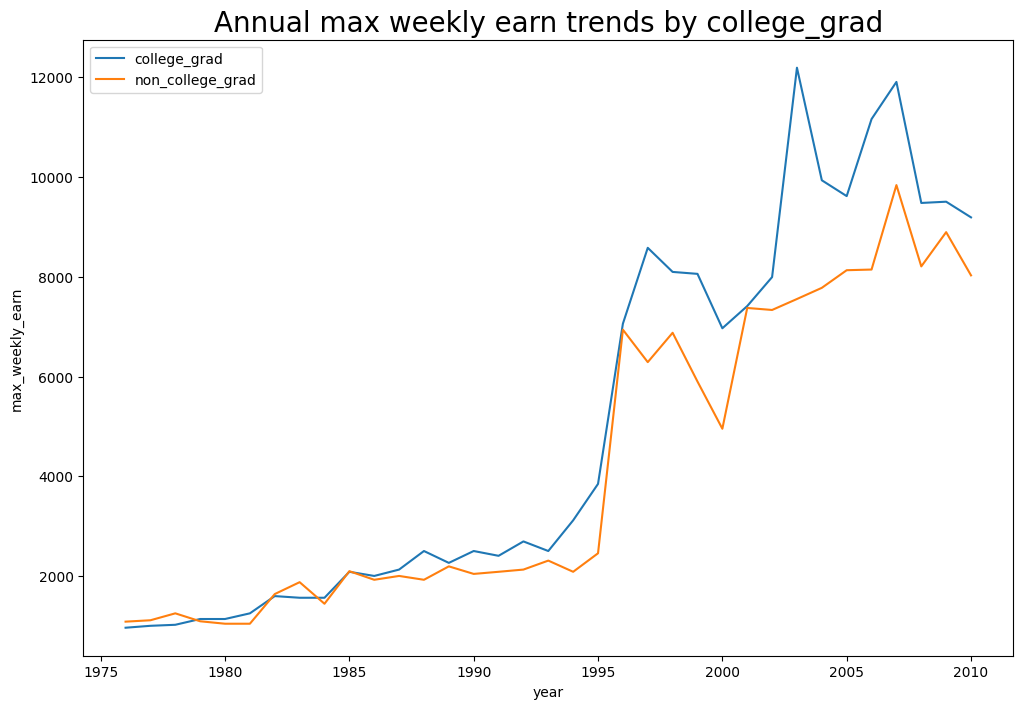

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Annual max weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=max_grad_data.loc[(max_grad_data['college_grad']==1)],
             x=max_grad_data.loc[(max_grad_data['college_grad']==1)]['year'],
             y='max_weekly_earn',
             label='college_grad')
sns.lineplot(data=max_grad_data.loc[(max_grad_data['college_grad']==0)],
             x=max_grad_data.loc[(max_grad_data['college_grad']==0)]['year'],
             y='max_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

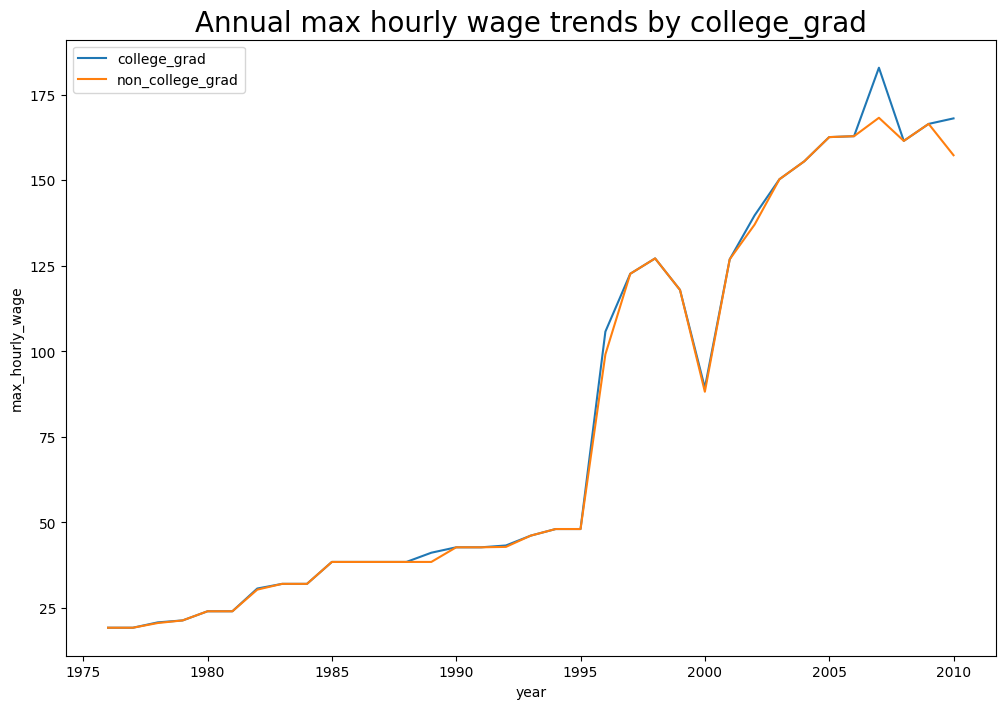

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual max hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=max_grad_data.loc[(max_grad_data['college_grad']==1)],
             x=max_grad_data.loc[(max_grad_data['college_grad']==1)]['year'],
             y='max_hourly_wage',
             label='college_grad')
sns.lineplot(data=max_grad_data.loc[(max_grad_data['college_grad']==0)],
             x=max_grad_data.loc[(max_grad_data['college_grad']==0)]['year'],
             y='max_hourly_wage',
             label='non_college_grad')
plt.legend()
plt.show()

### 연도별 대학 졸업에 따른 상위 10% 임금

In [ ]:
high10_grad_data = data.groupby(['year', 'college_grad'])\
                .quantile(0.90)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

high10_grad_data.columns = ['year', 'college_grad', 'high10_weekly_earn', 'high10_hourly_wage']
high10_grad_data.head()

,year,college_grad,high10_weekly_earn,high10_hourly_wage
0,1976,0,334.621155,7.894226
1,1976,1,480.769226,11.113008
2,1977,0,364.130774,8.547009
3,1977,1,504.173065,11.538462
4,1978,0,391.234021,9.134615


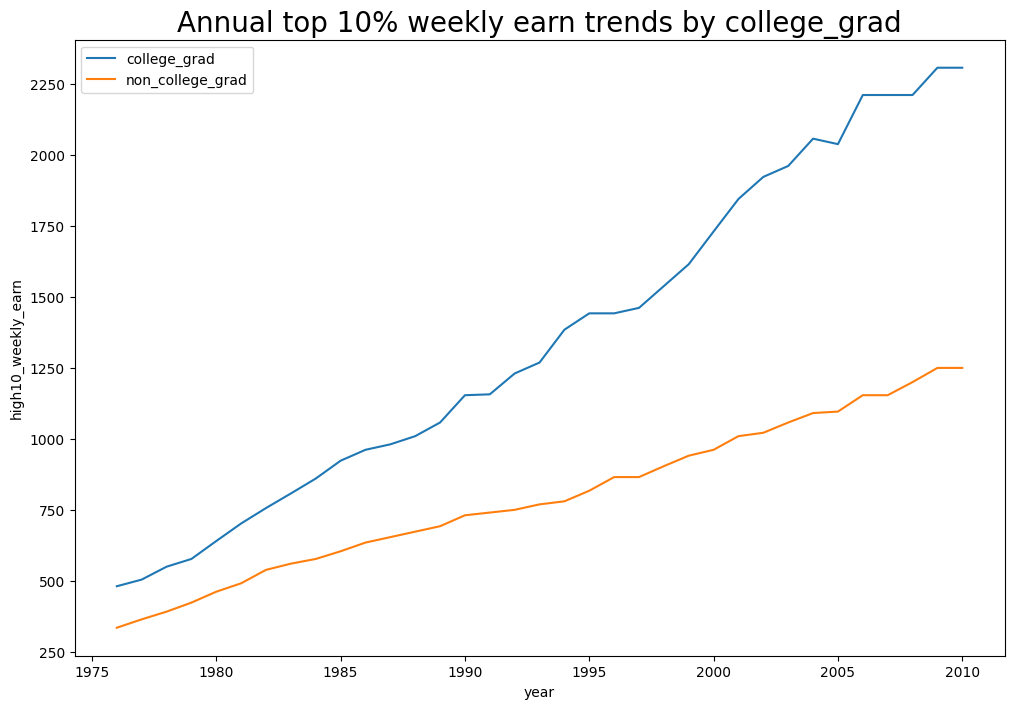

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual top 10% weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=high10_grad_data.loc[(high10_grad_data['college_grad']==1)],
             x=high10_grad_data.loc[(high10_grad_data['college_grad']==1)]['year'],
             y='high10_weekly_earn',
             label='college_grad')
sns.lineplot(data=high10_grad_data.loc[(high10_grad_data['college_grad']==0)],
             x=high10_grad_data.loc[(high10_grad_data['college_grad']==0)]['year'],
             y='high10_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


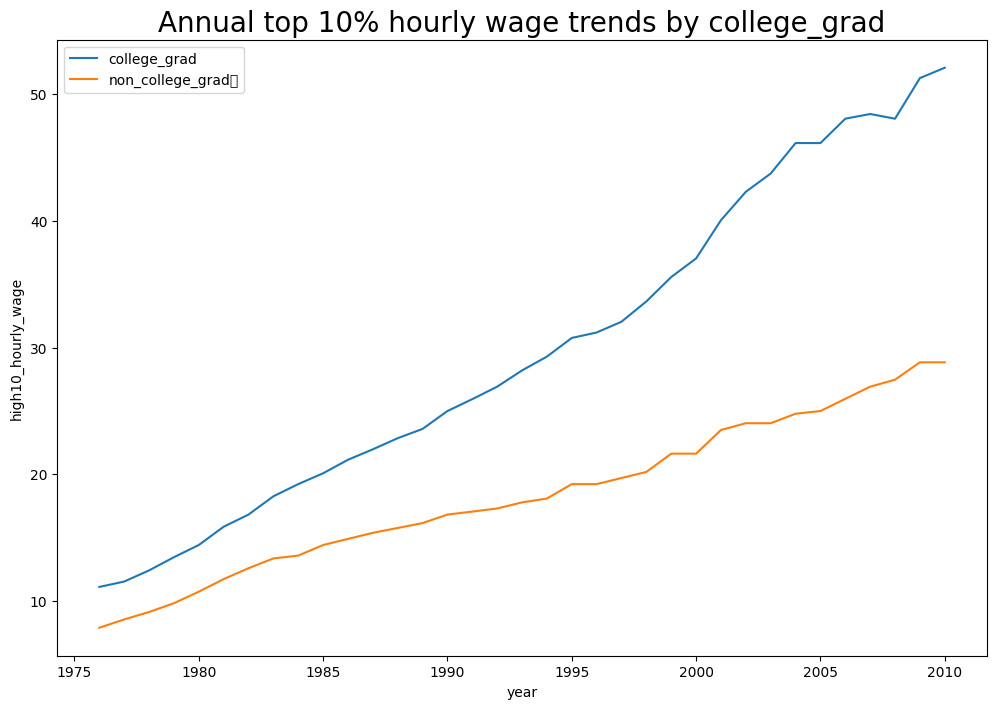

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual top 10% hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=high10_grad_data.loc[(high10_grad_data['college_grad']==1)],
             x=high10_grad_data.loc[(high10_grad_data['college_grad']==1)]['year'],
             y='high10_hourly_wage',
             label='college_grad')
sns.lineplot(data=high10_grad_data.loc[(high10_grad_data['college_grad']==0)],
             x=high10_grad_data.loc[(high10_grad_data['college_grad']==0)]['year'],
             y='high10_hourly_wage',
             label='non_college_grad	')
plt.legend()
plt.show()

### 연도별 대학 졸업에 따른 최저 임금

In [ ]:
plt.figure(figsize=(12,8))
min_grad_data = data.groupby(['year', 'college_grad'])\
                .min()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

min_grad_data.columns = ['year', 'college_grad', 'min_weekly_earn', 'min_hourly_wage']
min_grad_data.head()

,year,college_grad,min_weekly_earn,min_hourly_wage
0,1976,0,42.461540,1.415385
1,1976,1,50.000000,1.442308
2,1977,0,43.375000,1.442308
3,1977,1,43.478260,1.442308
4,1978,0,48.076923,1.490385


<Figure size 1200x800 with 0 Axes>

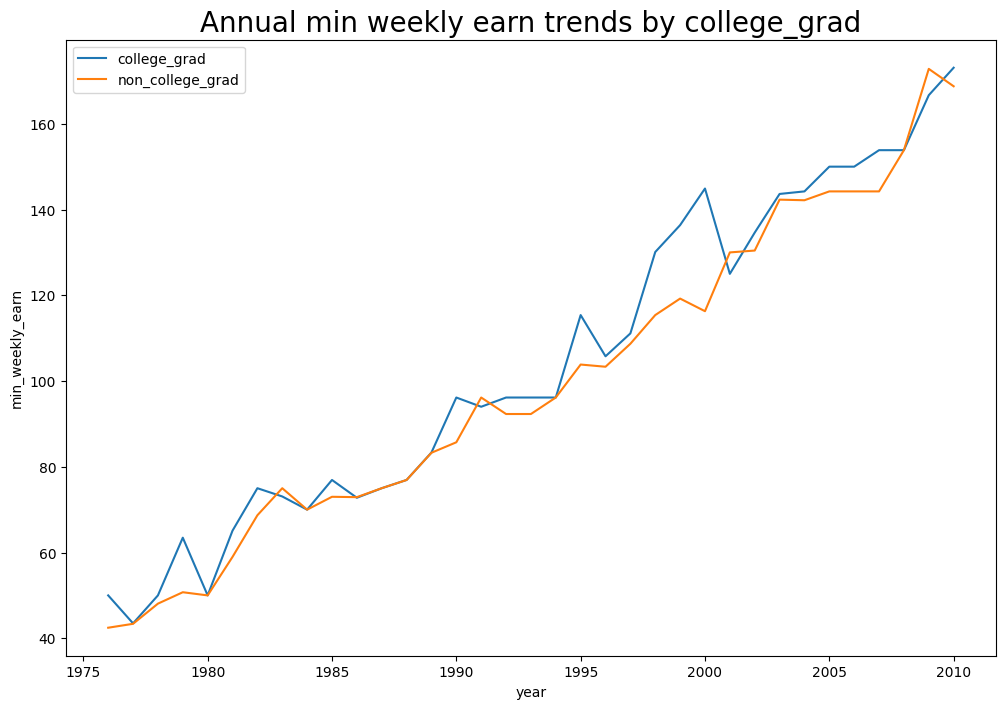

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual min weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=min_grad_data.loc[(min_grad_data['college_grad']==1)],
             x=min_grad_data.loc[(min_grad_data['college_grad']==1)]['year'],
             y='min_weekly_earn',
             label='college_grad')
sns.lineplot(data=min_grad_data.loc[(min_grad_data['college_grad']==0)],
             x=min_grad_data.loc[(min_grad_data['college_grad']==0)]['year'],
             y='min_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

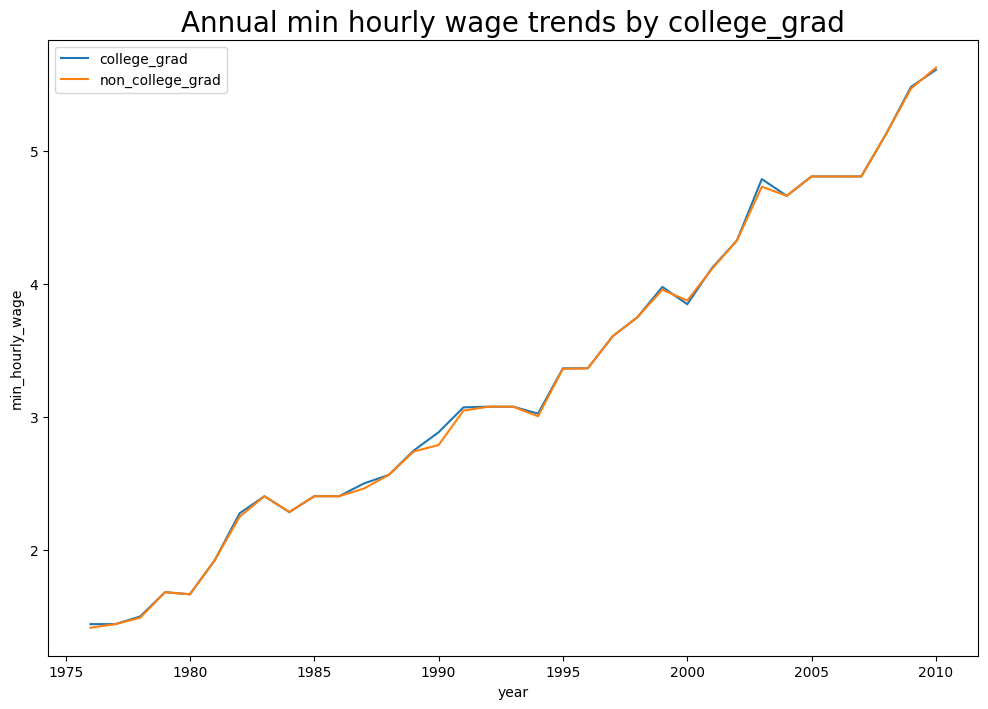

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual min hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=min_grad_data.loc[(min_grad_data['college_grad']==1)],
             x=min_grad_data.loc[(min_grad_data['college_grad']==1)]['year'],
             y='min_hourly_wage',
             label='college_grad')
sns.lineplot(data=min_grad_data.loc[(min_grad_data['college_grad']==0)],
             x=min_grad_data.loc[(min_grad_data['college_grad']==0)]['year'],
             y='min_hourly_wage',
             label='non_college_grad')
plt.legend()
plt.show()

### 연도별 대학 졸업에 따른 하위 10% 임금

In [ ]:
low10_grad_data = data.groupby(['year', 'college_grad'])\
                .quantile(0.10)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

low10_grad_data.columns = ['year', 'college_grad', 'low10_weekly_earn', 'low10_hourly_wage']
low10_grad_data.head()

,year,college_grad,low10_weekly_earn,low10_hourly_wage
0,1976,0,100.000000,2.500000
1,1976,1,146.980766,3.413462
2,1977,0,106.382980,2.644231
3,1977,1,152.100514,3.410402
4,1978,0,115.384613,2.850192


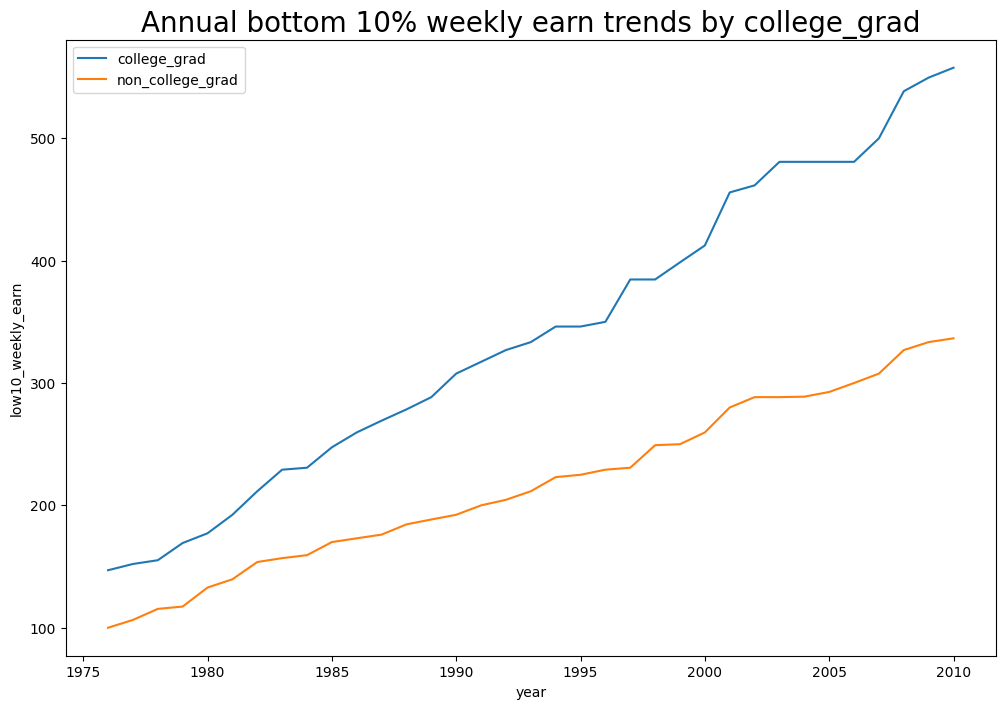

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Annual bottom 10% weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=low10_grad_data.loc[(low10_grad_data['college_grad']==1)],
             x=low10_grad_data.loc[(low10_grad_data['college_grad']==1)]['year'],
             y='low10_weekly_earn',
             label='college_grad')
sns.lineplot(data=low10_grad_data.loc[(low10_grad_data['college_grad']==0)],
             x=low10_grad_data.loc[(low10_grad_data['college_grad']==0)]['year'],
             y='low10_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

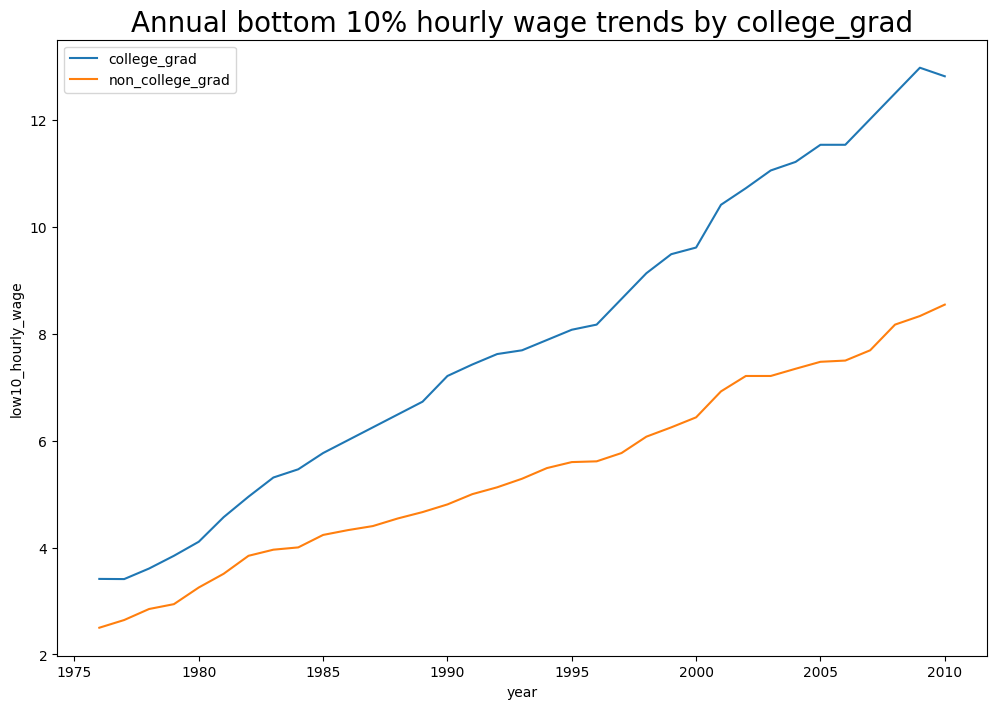

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Annual bottom 10% hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=low10_grad_data.loc[(low10_grad_data['college_grad']==1)],
             x=low10_grad_data.loc[(low10_grad_data['college_grad']==1)]['year'],
             y='low10_hourly_wage',
             label='college_grad')
sns.lineplot(data=low10_grad_data.loc[(low10_grad_data['college_grad']==0)],
             x=low10_grad_data.loc[(low10_grad_data['college_grad']==0)]['year'],
             y='low10_hourly_wage',
             label='non_college_grad')
plt.legend()
plt.show()

### 연도별 대학 졸업에 따른 임금 표준편차

In [ ]:
std_grad_data = data.groupby(['year', 'college_grad'])\
                .std()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

std_grad_data.columns = ['year', 'college_grad', 'std_weekly_earn', 'std_hourly_wage']
std_grad_data.head()

,year,college_grad,std_weekly_earn,std_hourly_wage
0,1976,0,98.236628,2.205426
1,1976,1,152.737879,3.184327
2,1977,0,108.611126,2.439002
3,1977,1,157.649692,3.317970
4,1978,0,119.727368,2.647454


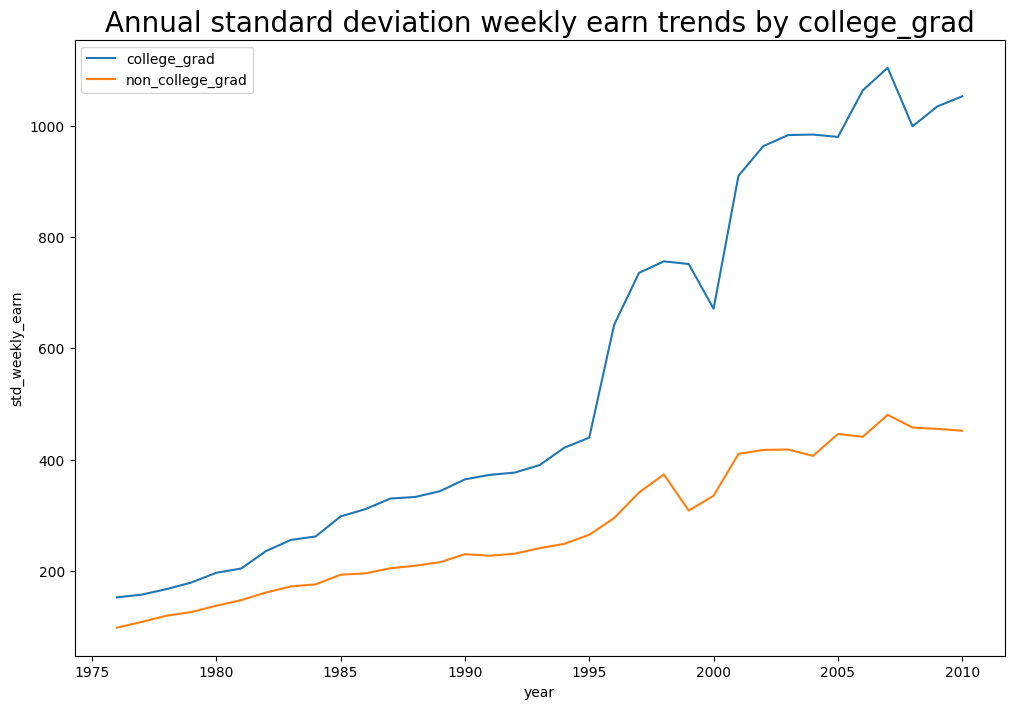

In [ ]:
plt.figure(figsize=(12,8))

plt.title('Annual standard deviation weekly earn trends by college_grad', fontsize=20)
sns.lineplot(data=std_grad_data.loc[(std_grad_data['college_grad']==1)],
             x=std_grad_data.loc[(std_grad_data['college_grad']==1)]['year'],
             y='std_weekly_earn',
             label='college_grad')
sns.lineplot(data=std_grad_data.loc[(std_grad_data['college_grad']==0)],
             x=std_grad_data.loc[(std_grad_data['college_grad']==0)]['year'],
             y='std_weekly_earn',
             label='non_college_grad')
plt.legend()
plt.show()

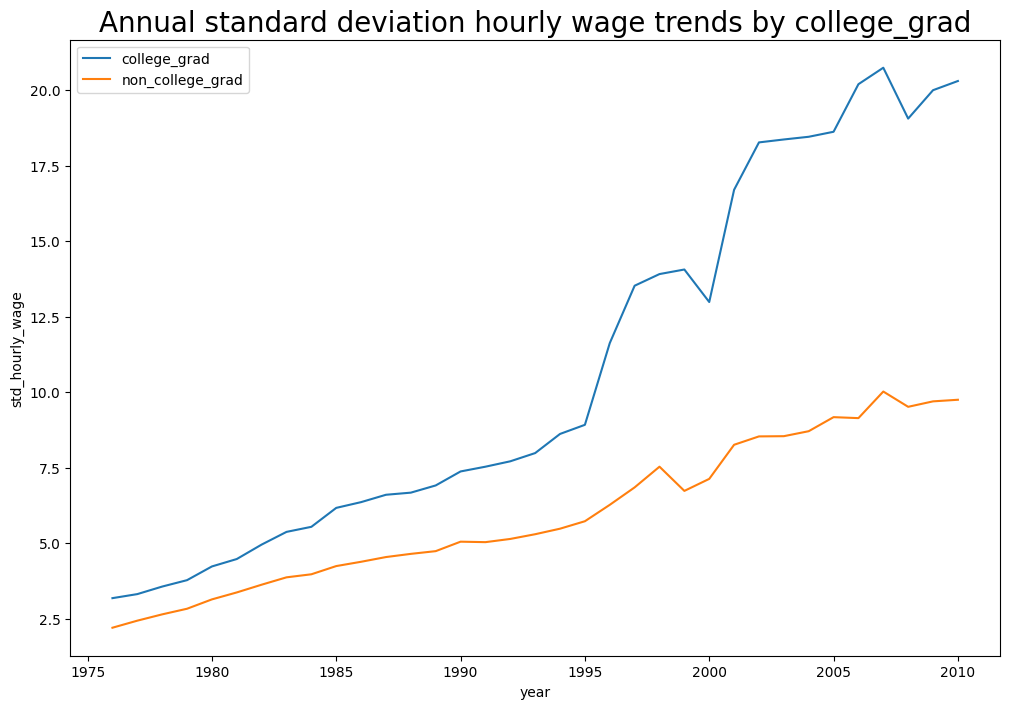

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Annual standard deviation hourly wage trends by college_grad', fontsize=20)
sns.lineplot(data=std_grad_data.loc[(std_grad_data['college_grad']==1)],
             x=std_grad_data.loc[(std_grad_data['college_grad']==1)]['year'],
             y='std_hourly_wage',
             label='college_grad')
sns.lineplot(data=std_grad_data.loc[(std_grad_data['college_grad']==0)],
             x=std_grad_data.loc[(std_grad_data['college_grad']==0)]['year'],
             y='std_hourly_wage',
             label='non_college_grad')
plt.legend()
plt.show()